In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Получите данные и загрузите их в рабочую среду

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 2. Проведите первичный анализ

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### 3. Проверьте данные на пропуски. Удалите в случае обнаружения
Согласно документации к датасету пропущенные значения присутствуют в трех атрибутах: `workclass`, `occupation` и `native-country`. С помощью метода подсчета значений видно, что в этих параметрах присутствуют значения `?`, которые и являются пропущенными. Их количество не очень большое относительно размера датасета, и для нашей задачи мы можем пожертвовать такой небольшой частью наблюдений.

In [5]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [6]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [7]:
df['native-country'].value_counts().head()

United-States    43832
Mexico             951
?                  857
Philippines        295
Germany            206
Name: native-country, dtype: int64

In [8]:
df = df[df['workclass'] != '?']
df = df[df['occupation'] != '?']
df = df[df['native-country'] != '?']

В результате мы получили датасет с 45222 наблюдениями, среди которых нет пропущенных значений.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


Есть также два похожих столбца `education` и `educational-num`. Для того, чтобы избавиться от столбца `education` надо проверить является ли на самом деле столбец `educational-num` его числовым представлением.

In [10]:
df['education'].value_counts().values == df['educational-num'].value_counts().values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [11]:
df = df.drop('education', axis=1)

### 4. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [12]:
gender_race_df = df[['race', 'gender']].groupby('race').value_counts().sort_values(ascending=False)
gender_race_df

race                gender
White               Male      27020
                    Female    11883
Black               Male       2144
                    Female     2084
Asian-Pac-Islander  Male        867
                    Female      436
Amer-Indian-Eskimo  Male        269
Other               Male        227
Amer-Indian-Eskimo  Female      166
Other               Female      126
dtype: int64

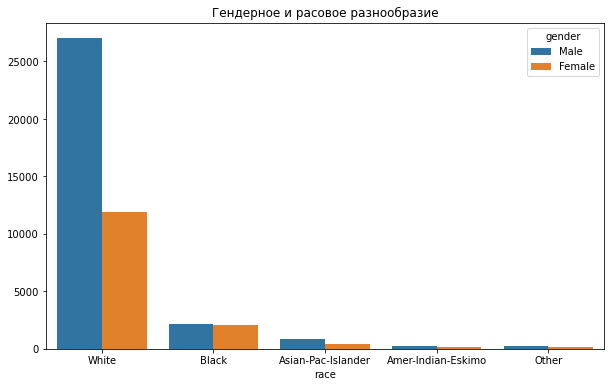

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_race_df.index.get_level_values(0),
            y=gender_race_df.values,
            hue=gender_race_df.index.get_level_values(1))
plt.title('Гендерное и расовое разнообразие')
plt.show()

Из графика очевидно, что записи в датасете в подавляющем большинстве относятся к людям европиоидной расы со значительным преобладанием мужчин в выборке. Необходимо учитывать это при формировании выводов, так как данная выборка может быть репрезентативной не для каждой задачи.

In [14]:
age_hours_df = df[['age', 'hours-per-week']]
age_hours_df.head()

,age,hours-per-week
0,25,40
1,38,50
2,28,40
3,44,40
5,34,30


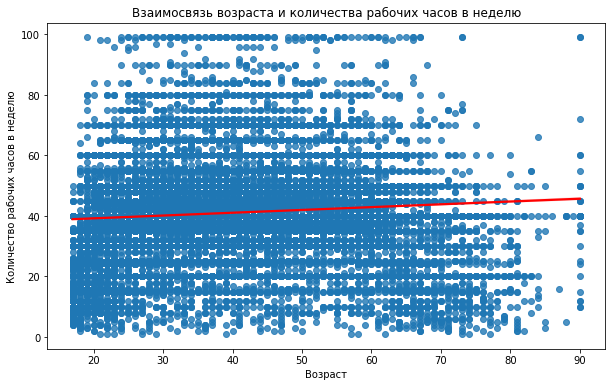

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(x=age_hours_df['age'],
            y=age_hours_df['hours-per-week'],
            line_kws = {"color": "red"})
plt.title('Взаимосвязь возраста и количества рабочих часов в неделю')
plt.xlabel('Возраст')
plt.ylabel('Количество рабочих часов в неделю')
plt.show()

Изображенная на графике линия регрессии имеет очень небольшой наклон, что говорит нам о слабой линейной взаимосвязи между возрастом и количеством рабочих часов в неделю. Тем не менее наклон линии слегка положительный, из чего можно сделать вывод, что в среднем с возрастом опрошенные люди работают больше часов в неделю.

Я бы связал такой результат с естественной неравномерностью возрастных групп, представленных в данных. Согласно построенной ниже гистограммы, наблюдения находятся главным образом в возрастном диапазоне 20-50 лет, когда человек наиболее трудоспособен. С дальнейшим увеличением возраста объем данных начинает резко снижаться. Это закономерно, поскольку все больше людей уходит на пенсию и данные об их профессиональном доходе уже не составляют наш датасет.

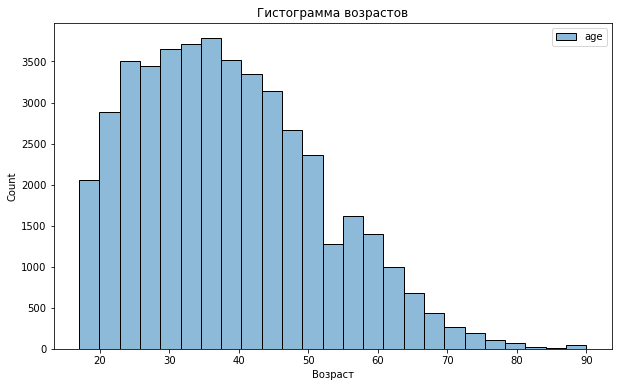

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(age_hours_df[['age']], bins=25)
plt.title('Гистограмма возрастов')
plt.xlabel('Возраст')
plt.show()

### 5. Преобразуйте категориальные признаки

In [17]:
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [18]:
df = pd.get_dummies(df, columns=['workclass', 'marital-status', 'occupation',
                                 'relationship', 'race', 'gender', 'native-country'])

In [19]:
X = df.drop('income', axis=1)

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['income'])
y = pd.Series(data=le.transform(df['income']), index=df.index)

### 6. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7. Обучите модели логистической регрессии и опорных векторов на обучающем множестве

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_model = make_pipeline(StandardScaler(), LogisticRegression())
svc_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))

In [23]:
lr_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

### 8. Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score

In [24]:
lr_model.score(X_test, y_test)

0.8506357103372029

In [25]:
svc_model.score(X_test, y_test)

0.8494195688225539

### 9. Сформулируйте выводы по проделанной работе

 - Кратко опишите какие преобразования были сделаны с данными

Для подготовки данных к машинному обучению необходимо было обеспечить отсутствие пропущенных и неоднозначных значений, а также привести категориальные признаки к числовому виду с помощью добавления новых столбцов.

 - Сравните точность двух моделей

Точность предсказаний у обеих моделей на достаточно высоком уровне. Логистическая регрессия дает чуть более точные предсказания на уровне 85,06%. Метод опорных векторов немного уступает, показывая точность 84,94%. Разницу между двумя этими показателями нельзя назвать существенной. Однако я ожидал, что метод опорных векторов, как более современный и продвинутый будет давать предсказания точнее, чем логистическая регрессия.

 - Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат?

Для учебных целей, я считаю, что полученная в обеих случаях точность 85% является достаточной. Тем не менее в зависимости от поставленной задачи могут потребоваться и более точные предсказания. На мой взгляд улучшить результат можно было бы подобрав оптимальные настройки метода опорных векторов, к примеру тип ядра и уровень значения gamma. При этом необходимо следить за тем, чтобы модель не переобучилась на тренировочных даннах. Еще один способ попробовать улучшить результат - это отобрать наиболее релевантные признаки в датасете и избавиться от тех, которые возможно ведут к зашумлению даннах.